<a href="https://colab.research.google.com/github/VictorRegueira/VARR_Bourbaki/blob/main/WorkingAnalyst/Mod1/VARR_WorkingAnalyst_Mod1_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working Analyst Módulo I: clasificación
- **Nombre:** Víctor Alejnadro Regueira Romero

# Paso 1. Carga de los datos



## Importar librerías

In [1]:
import numpy as np   # Biblioteca para manejar matrices y operaciones de matrices
import pandas as pd  # Biblioteca para manejar tablas de datos.

# Sklearn (Scikit-learn) es la  principal biblioteca para machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Bibliotecas para gráficar y visualizar.
import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [2]:
def describe_datos(df):
    unicos =[]
    for col in df:
        unicos.append(df[col].unique())
    unicos = pd.Series(unicos, index=df.columns)
    descripcion = pd.concat([df.dtypes, df.isna().sum(),df.nunique(),unicos], axis=1)
    descripcion.columns = ['dtypes', 'null','nunique','unique' ]
    return(descripcion)

## Cargando archivo raw

In [3]:
# !wget https://github.com/VictorRegueira/VARR_Bourbaki/raw/main/WorkingAnalyst/Mod1/FraudeCanastas.zip
# !unzip FraudeCanastas.zip

In [4]:
df_raw = pd.read_csv('/content/FraudeCanastas.csv')
df_raw.shape

(9319, 2457)

In [5]:
df_raw.head(10)

,ID,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE,AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH WIRELESS CHARGING CASE 2ND,AUDIO ACCESSORIES | APPLE | 2021 APPLE AIRPODS WITH MAGSAFE CHARGING CASE 3RD,AUDIO ACCESSORIES | APPLE | AIRPODS PRO,AUDIO ACCESSORIES | APPLE | APPLE AIRPODS MAX,...,WOMEN S NIGHTWEAR | ANYDAY RETAILER | ANYDAY RETAILER LEOPARD PRINT JERSEY PY,WOMEN S NIGHTWEAR | RETAILER | RETAILER CLEO VELOUR JOGGER LOUNGE PANT,WOMEN S NIGHTWEAR | SOSANDAR | SOSANDAR ZEBRA PRINT PYJAMA BOTTOMS BLACK 10,Nb_of_items,total_of_items,costo_total,costo_medio_item,costo_item_max,costo_item_min,fraud_flag
0,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1299,649.500000,1299,0.0,1.0
1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3,3,4119,1373.000000,2470,0.0,1.0
2,217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,2806,1403.000000,2799,7.0,1.0
3,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
4,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,19,27,1807,66.925926,195,4.0,1.0
5,855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8,9,1263,140.333333,280,4.0,1.0
6,856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,942,471.000000,938,4.0,1.0
7,941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1199,599.500000,1199,0.0,1.0
8,1157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,1206,603.000000,1199,7.0,1.0
9,1543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,2,936,468.000000,929,7.0,1.0


# Paso 2. EDA

## Análisis de Nulos

In [6]:
df_raw.isna().sum().sort_values(ascending = False)

,0
ID,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER MEDIUM 2 SEATER SOFA,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER LARGE 3 SEATER LEATHER,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER LARGE 3 SEATER SOFA,0
LIVING DINING FURNITURE | RETAILER | RETAILER DRAPER LARGE 3 SEATER SOFA DAR,0
...,...
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL KM7120W MULTI-DEVICE WIRELESS KEYBOARD AND MO,0
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL S2421H FULL HD MONITOR 23 8 PLATINUM SILVER,0
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL S2721DGFA QUAD HD GAMING MONITOR 27 BLACK,0
COMPUTER PERIPHERALS ACCESSORIES | DELL | DELL S2722QC 4K ULTRA HD MONITOR 27 PLATINUM SILVE,0


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9319 entries, 0 to 9318
Columns: 2457 entries, ID to fraud_flag
dtypes: float64(2452), int64(5)
memory usage: 174.7 MB


In [8]:
# Calculate the sum of each column in the DataFrame
column_sums = df_raw.sum()

# Identify columns where the sum is zero
zero_sum_columns = column_sums[column_sums == 0].index

# Print the names of the columns with zero sums
print("Columns with zero sum:")
zero_sum_columns


Columns with zero sum:


Index([], dtype='object')

## Verificamos los tipos de datos de las columnas

In [9]:
# Function to get unique counts or total length for numerical columns
def unique_or_len(series):
    return series.nunique()

# Create the summary DataFrame
df_summary = pd.DataFrame({
    'Column': df_raw.columns,
    'Total_Unique_Values': [unique_or_len(df_raw[col]) for col in df_raw.columns],
    'Type': df_raw.dtypes
})

df_summary.reset_index(drop=True, inplace=True)

In [10]:
df_summary.sort_values(by='Total_Unique_Values', ascending=False).head(10)

,Column,Total_Unique_Values,Type
0,ID,9319,int64
2453,costo_medio_item,2034,float64
2452,costo_total,1639,int64
2454,costo_item_max,540,int64
2455,costo_item_min,528,float64
1424,LIVING & DINING FURNITURE | RETAILER | RETAILER,62,float64
2451,total_of_items,34,int64
2450,Nb_of_items,28,int64
879,COMPUTERS | APPLE | 2020 APPLE IPAD AIR 10 9 A...,26,float64
729,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | A...,25,float64


In [11]:
print(df_summary[df_summary['Total_Unique_Values'] > 2].count())

Column                 525
Total_Unique_Values    525
Type                   525
dtype: int64


In [12]:
df_summary[df_summary['Total_Unique_Values'] > 2].sort_values(by='Total_Unique_Values', ascending=False).head(15)

,Column,Total_Unique_Values,Type
0,ID,9319,int64
2453,costo_medio_item,2034,float64
2452,costo_total,1639,int64
2454,costo_item_max,540,int64
2455,costo_item_min,528,float64
1424,LIVING & DINING FURNITURE | RETAILER | RETAILER,62,float64
2451,total_of_items,34,int64
2450,Nb_of_items,28,int64
879,COMPUTERS | APPLE | 2020 APPLE IPAD AIR 10 9 A...,26,float64
729,COMPUTER PERIPHERALS & ACCESSORIES | APPLE | A...,25,float64


In [13]:
df_summary[df_summary['Total_Unique_Values'] == 2].sort_values(by='Total_Unique_Values', ascending=False)

,Column,Total_Unique_Values,Type
1,APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,2,float64
1678,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1632,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1631,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
1628,LIVING DINING FURNITURE | RETAILER | RETAILER ...,2,float64
...,...,...,...
828,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
827,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
826,COMPUTER PERIPHERALS ACCESSORIES | LACIE | LAC...,2,float64
825,COMPUTER PERIPHERALS ACCESSORIES | HP | HP M24...,2,float64


In [14]:
describe_datos(df_raw)

,dtypes,null,nunique,unique
ID,int64,0,9319,"[130, 195, 217, 552, 854, 855, 856, 941, 1157,..."
APPLE PRODUCTDESCRIPTION | SAMSUNG | MODEL90,float64,0,2,"[0.0, 1000.0]"
AUDIO ACCESSORIES | AB AUDIO | AB AUDIO GO AIR TRUE WIRELESS BLUETOOTH IN-EAR H,float64,0,2,"[0.0, 20.0]"
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE,float64,0,8,"[0.0, 125.0, 119.0, 120.0, 500.0, 129.0, 109.0..."
AUDIO ACCESSORIES | APPLE | 2019 APPLE AIRPODS WITH CHARGING CASE 2ND GENERATI,float64,0,8,"[0.0, 109.0, 100.0, 105.0, 104.0, 99.0, 119.0,..."
...,...,...,...,...
costo_total,int64,0,1639,"[1299, 4119, 2806, 1206, 1807, 1263, 942, 1199..."
costo_medio_item,float64,0,2034,"[649.5, 1373.0, 1403.0, 603.0, 66.925925925925..."
costo_item_max,int64,0,540,"[1299, 2470, 2799, 1199, 195, 280, 938, 929, 1..."
costo_item_min,float64,0,528,"[0.0, 7.0, 4.0, 1249.0, 25.0, 2470.0, 999.0, 1..."


In [15]:
df_raw['LIVING & DINING FURNITURE | RETAILER | RETAILER'].value_counts()

,count
LIVING & DINING FURNITURE | RETAILER | RETAILER,
0.0,9241
1499.0,4
899.0,3
2050.0,3
3198.0,2
...,...
898.0,1
882.0,1
1828.0,1


## Obervaciones:

- 525 de las columnas tienen valores superiores a 2 valores
- Los valores son flotantes o enteros
- Hay 6 variables que muestran estadísticas de costos e items

In [16]:
# Nb_of_items
# total_of_items
# costo_total
# costo_medio_item
# costo_item_max
# costo_item_min


# for col in df_raw.columns:
#   col_lower = col.lower()
#   if 'costo' not in col_lower or 'Nb_of_items' not in col_lower or 'total_of_items' not in col_lower :
#     df_raw[col] = df_raw[col].astype('object')

## Análisis de estadísticas

In [17]:
import matplotlib.pyplot as plt

# Select the relevant columns for statistical analysis
cost_columns = ['Nb_of_items', 'total_of_items', 'costo_total', 'costo_medio_item', 'costo_item_max', 'costo_item_min','fraud_flag']
cost_data = df_raw[cost_columns]

# Display descriptive statistics
cost_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Nb_of_items,9319.0,1.774761,1.541868,1.000000,1.0,1.0,2.0,38.0
total_of_items,9319.0,1.856852,1.922323,1.000000,1.0,1.0,2.0,44.0
costo_total,9319.0,1337.801052,1070.597321,219.000000,838.0,1124.0,1612.0,24551.0
costo_medio_item,9319.0,898.376189,734.425487,41.615385,445.5,745.4,1150.0,19999.0
costo_item_max,9319.0,1184.433416,786.942018,130.000000,749.0,1049.0,1415.5,19999.0
costo_item_min,9319.0,647.735165,841.194373,0.000000,7.0,379.0,1099.0,19999.0
fraud_flag,9319.0,0.141539,0.348595,0.000000,0.0,0.0,0.0,1.0


In [18]:
# Calculate the correlation matrix
correlation_matrix = cost_data.corr()

# Get the correlation with 'fraud_flag'
correlation_with_fraud = correlation_matrix['fraud_flag'].abs().sort_values(ascending=False)

# Select the top 20 variables
top_20_correlated = correlation_with_fraud[1:21]  # Exclude 'fraud_flag' itself

top_20_correlated

,fraud_flag
costo_item_max,0.128600
costo_total,0.105138
costo_medio_item,0.103919
costo_item_min,0.049651
total_of_items,0.006276
Nb_of_items,0.004774


# Paso 3. Construcción de nuestro clasificador

## Crear conjunto de características y variable objetivo

In [19]:
df_raw['fraud_flag'].value_counts(sort=False, normalize=True)

,proportion
fraud_flag,
1.0,0.141539
0.0,0.858461


Hallazgo: Se encuentra desbalanceado la variable objetivo.

In [20]:
X = df_raw.drop('fraud_flag', axis=1)
y = df_raw['fraud_flag']

## Crear subconjuntos de entrenamiento y prueba

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

In [22]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("--------------------------")

print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Not fraud: ', counts[0],'\nFraud: ', counts[1])

print("\nTest set")
print("--------------------------")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Not fraud: ', counts[0],'\nFraud: ', counts[1],'\n')

Training set
--------------------------
X:  (7455, 2456)
y:  (7455,)
Not fraud:  6403 
Fraud:  1052

Test set
--------------------------
X:  (1864, 2456)
y:  (1864,)
Not fraud:  1597 
Fraud:  267 



## Entrenamiento modelo base

In [23]:
model = Perceptron(max_iter=1000, random_state=15, verbose=False)
model.fit(X_train, y_train)

print("Iterations: ", model.n_iter_)

Iterations:  14


In [25]:
print("Exactitud conjunto entrenamiento: %.2f%%" % (model.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 85.82%
Exactitud conjunto prueba: 85.68%


## Predicción modelo base

In [26]:
y_predict = model.predict(X_test)

In [27]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df = pd.DataFrame(data)

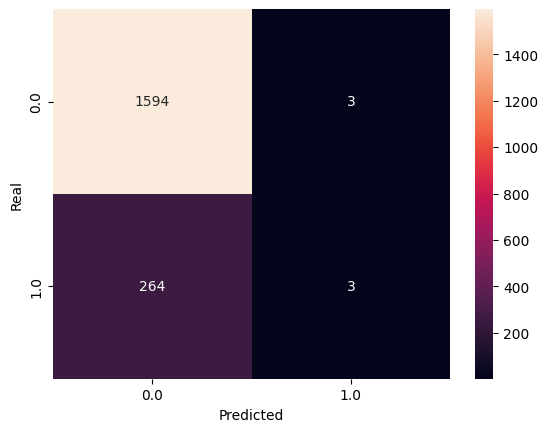

In [28]:
# Matriz de confusión

confusion_matrix = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Real'],
                               colnames=['Predicted'])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

## Grid Search

In [29]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'alpha': [0.0001, 0.001],
#     'max_iter': [500],
#     'shuffle':[True]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=Perceptron(random_state=15, verbose=False),
#                            param_grid=param_grid,
#                            cv=5,  # Number of cross-validation folds
#                            scoring='accuracy', #'roc_auc' # Evaluation metric
#                            n_jobs=-1)  # Use all available CPU cores

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)


# # Print the best hyperparameters and the best score
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

- Best Hyperparameters: {'alpha': 0.001, 'max_iter': 500, 'penalty': 'l1', 'shuffle': True}
- Best Score: 0.8531187122736418

## Select best model

In [30]:
model2 =  Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model2.fit(X_train, y_train)

print("Iterations: ", model2.n_iter_)
print("Exactitud conjunto entrenamiento: %.2f%%" % (model2.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model2.score(X_test,
                                                          y_test)*100.0))

Iterations:  20
Exactitud conjunto entrenamiento: 85.29%
Exactitud conjunto prueba: 85.46%


In [37]:
model3 =  Perceptron(max_iter=100,  random_state=0, verbose=False,
                    penalty='l1', alpha=0.001)
model3.fit(X_train, y_train)

print("Iterations: ", model2.n_iter_)
print("Exactitud conjunto entrenamiento: %.2f%%" % (model3.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model3.score(X_test,
                                                          y_test)*100.0))

Iterations:  20
Exactitud conjunto entrenamiento: 85.11%
Exactitud conjunto prueba: 84.98%


In [38]:
model4 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.000005)

model4.fit(X_train,y_train)

print("Exactitud conjunto entrenamiento: %.2f%%" % (model4.score(X_train,
                                                                 y_train)*100.0))
print("Exactitud conjunto prueba: %.2f%%" % (model4.score(X_test,
                                                          y_test)*100.0))

Exactitud conjunto entrenamiento: 85.79%
Exactitud conjunto prueba: 85.68%


# Paso 4: Clasificador final

Al final he decidido quedarme por el modelo base, el cuál presentó similares resultados en la métrica de accuracy (exactitud), pero no tuve que modificar los hiperparámetros siguiendo alguna hipótesis.

In [39]:
clf = model

In [40]:
clf.get_params(deep=True)

{'alpha': 0.0001,
 'class_weight': None,
 'early_stopping': False,
 'eta0': 1.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': None,
 'random_state': 15,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [33]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy'}

cv_results = cross_validate(clf, X, y, cv=5, scoring=scoring)

print("\nDetailed Cross-validation results:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
      print(f"{metric}: {scores}")
      print(f"Mean {metric}: {np.mean(scores)}")
      print(f"Standard Deviation {metric}: {np.std(scores)}")




Detailed Cross-validation results:
test_accuracy: [0.85944206 0.82242489 0.85193133 0.84603004 0.84809447]
Mean test_accuracy: 0.8455845594926268
Standard Deviation test_accuracy: 0.012451346136067775


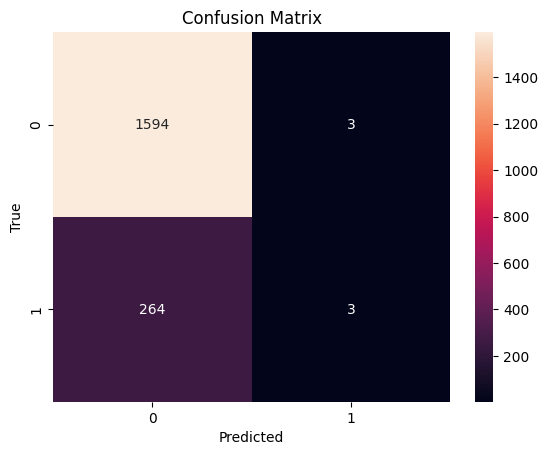

In [43]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_predict are already defined from your previous code
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
